In [4]:
import spotipy
import pandas as pd

import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import seaborn as sns

import umap

In [5]:
cid = '020f2ed496864af6ab98a08846eac5da'
secret = 'abd17ef2d04d4d3abd706ec03db71646'

client_credentials_manager = spotipy.SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [6]:
playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key",
                          "loudness","mode", "speechiness","instrumentalness","liveness","valence",
                          "tempo", "duration_ms","time_signature"]

test = pd.DataFrame(columns = playlist_features_list)

# Function to get playlists

In [16]:
def call_playlist(playlist_links, countries, continents):
    """
    Iteratively calls data for a list of playlist-links and appends the data to a pd.DataFrame with additional
    columns for country & continent.
    
    This function was adapted for our data collecting purposes from:
    https://www.linkedin.com/pulse/extracting-your-fav-playlist-info-spotifys-api-samantha-jones
    
    Parameters
    ----------
    league : list(str)
        Contains final parts of the spotify playlist link, which is the playlist id. 
        Example: 37i9dQZEVXbLn7RQmT5Xv2 corresponds to "Top 50 - Egypt"
    countries: list(str)
        IOC country codes of the respective playlist 
        (https://de.wikipedia.org/wiki/Liste_der_IOC-L%C3%A4ndercodes)
    continents: list(str)
        Continent of the respective playlist
        
    Returns
    ----------
    pd.DataFrame containing the following information for all playlists:
    "artist","album","track_name",  "track_id","danceability","energy","key",
    "loudness","mode", "speechiness","instrumentalness","liveness","valence",
    "tempo", "duration_ms","time_signature" 
    """
    
    # Track metadata and features that will be analyzed in this project
    track_data = ["artist","album","track_name", "track_id"]
    features = ["danceability","energy","key", "loudness", "mode", "speechiness","instrumentalness",
                "liveness", "valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = track_data + features + ["country", "continent"])
    for country_data in zip(playlist_links, countries, continents):
        chart_playlist = sp.user_playlist_tracks("spotify", country_data[0])["items"]
        
        # For each track, iteratively get track metadata, features and add to playlist_df in the end
        for track in chart_playlist:
            track_features = {}  # will represent a single line for the track in playlist_df
            # Metadata:
            track_features["artist"] = track["track"]["album"]["artists"][0]["name"]
            track_features["album"] = track["track"]["album"]["name"]
            track_features["track_name"] = track["track"]["name"]
            track_features["track_id"] = track["track"]["id"]
            track_features["popularity"] = track["track"]["popularity"]
            
            # Features:
            audio_features = sp.audio_features(track_features["track_id"])[0]
            if audio_features is None:
                # Apparently, some track do not have features available. These tracks will be skipped.
                print("NOTE: Features for song '{}' by '{}' are not available, hence the song will be skipped".
                      format(track_features["track_name"], track_features["artist"]))
                continue
            
            for feat in features:
                track_features[feat] = audio_features[feat]
                
            # Geographical info:
            track_features["country"] = country_data[1]
            track_features["continent"] = country_data[2]
            
            # Concatenate line to playlist_df
            track_df = pd.DataFrame(track_features, index = [0])
            playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
            
    return playlist_df

In [17]:
links = ["37i9dQZEVXbLn7RQmT5Xv2", "37i9dQZEVXbKPTKrnFPD0G", "37i9dQZEVXbK4fwx2r07XW", "37i9dQZEVXbND4ZYa46PaA",
         "37i9dQZEVXbKzoK95AbRy9", "37i9dQZEVXbLJ0paT1JkgZ", "37i9dQZEVXbMw2iUtFR5Eq", "37i9dQZEVXbK8BKKMArIyl",
         "37i9dQZEVXbMPoK06pe7d6", "37i9dQZEVXbJPVQvqZqpcM", "37i9dQZEVXbJQ9kF73GOT2", "37i9dQZEVXbJHSzlHx2ZJU", 
         "37i9dQZEVXbMWDif5SCBJq", "37i9dQZEVXbIZK8aUquyx8", "37i9dQZEVXbJIvhIOxXxdp", "37i9dQZEVXbJ5J1TrbkAF9", 
         "37i9dQZEVXbJUPkgaWZcWG", "37i9dQZEVXbKqiTGXuCOsB", "37i9dQZEVXbMda2apknTqH", "37i9dQZEVXbL1Fl8vdBUba", 
         "37i9dQZEVXbKcS4rq3mEhp", "37i9dQZEVXbNM8vS9cIqAG", "37i9dQZEVXbKUoIkUXteF6", "37i9dQZEVXbIWlLQoMVEFp", 
         "37i9dQZEVXbK4BFAukDzj3", "37i9dQZEVXbLWYFZ5CkSvr", "37i9dQZEVXbM1EaZ0igDlz", "37i9dQZEVXbNSiWnkYnziz", 
         "37i9dQZEVXbMGcjiWgg253", "37i9dQZEVXbJVKdmjH0pON", "37i9dQZEVXbMZ5PAcNTDXd", "37i9dQZEVXbMeCoUmQDLUW", 
         "37i9dQZEVXbNALwC1jxb5m", "37i9dQZEVXbO839WGRmpu1", "37i9dQZEVXbKVvfnL1Us06", "37i9dQZEVXbKx6qX9uN66j", 
         "37i9dQZEVXbN66FupT0MuX", "37i9dQZEVXbMwW10JmAnzE", "37i9dQZEVXbMdvweCgpBAe", "37i9dQZEVXbJwoKy8qKpHG", 
         "37i9dQZEVXbJV3H3OfCN1z", "37i9dQZEVXbJZGli0rRP3r", "37i9dQZEVXbMVY2FDHm6NN", "37i9dQZEVXbLKI6MPixefZ", 
         "37i9dQZEVXbJARRcHjHcAr", "37i9dQZEVXbNcoJZ65xktI", "37i9dQZEVXbMYsavqzfk6k", "37i9dQZEVXbIZQf3WEYSut", 
         "37i9dQZEVXbMwmF30ppw50", "37i9dQZEVXbLp5XoPON0wI", "37i9dQZEVXbKZyn1mKjmIl"]

country_codes = ["EGY", "ARG", "AUS", "BEL", 
                 "BRA", "CHI", "DEN", "GER", 
                 "DOM", "ECU", "FIN", "GUA", 
                 "IND", "INA", "IRL", "ISR", 
                 "ITA", "JPN", "CAN", "COL", 
                 "MAS", "MAR", "MEX", "NZL", 
                 "HOL", "NOR", "AUT", "PAN", 
                 "PER", "PHI", "POL", "ROU", 
                 "RUS", "KSA", "SWE", "SUI", 
                 "SGP", "SVK", "HKG", "ESP", 
                 "RSA", "KOR", "TWN", "CZE", 
                 "TUR", "UKR", "HUN", "UAE", 
                 "GBR", "USA", "VIE"]

continent_codes = ["AFRICA", "SOUTH-AM", "AUS/OZEA", "EU", 
                   "SOUTH-AM", "SOUTH-AM", "EU", "EU", 
                   "NORTH-AM", "SOUTH-AM", "EU", "NORTH-AM", 
                   "ASIA", "ASIA", "EU", "ASIA", 
                   "EU", "ASIA", "NORTH-AM", "SOUTH-AM", 
                   "ASIA", "AFRICA", "NORTH-AM", "AUS/OZEA", 
                   "EU", "EU", "EU", "NORTH-AM", 
                   "SOUTH-AM", "ASIA", "EU", "EU", 
                   "EU", "ASIA", "EU", "EU", 
                   "ASIA", "EU", "ASIA", "EU", 
                   "AFRICA", "ASIA", "ASIA", "EU", 
                   "ASIA", "EU", "EU", "ASIA", 
                   "EU", "NORTH-AM", "ASIA"]
# "ASIA", "AFRICA", "NORTH-AM", "SOUTH-AM", "EU", "AUS/OZEA", "ANTARKTIKA"


In [18]:
t1 = call_playlist(links, country_codes, continent_codes)
t1

artist genres: ['egyptian alternative']
artist genres: []
artist genres: ['egyptian hip hop', 'egyptian pop']
artist genres: ['egyptian hip hop']
artist genres: ['egyptian hip hop']
artist genres: ['arab pop', 'egyptian pop']
artist genres: ['modern rock', 'rock']
artist genres: ['egyptian hip hop']
artist genres: ['egyptian hip hop']
artist genres: ['arab pop', 'egyptian pop']
artist genres: ['egyptian alternative']
artist genres: ['egyptian hip hop']
artist genres: ['egyptian alternative', 'egyptian pop']
artist genres: ['egyptian hip hop']
artist genres: ['lgbtq+ hip hop', 'pop']
artist genres: ['egyptian hip hop']
artist genres: ['egyptian hip hop']
artist genres: ['egyptian pop']
artist genres: ['egyptian hip hop']
artist genres: ['arab pop', 'belly dance', 'egyptian pop', 'persian pop', 'rif']
artist genres: ['egyptian hip hop']
artist genres: ['egyptian hip hop']
artist genres: ['gauze pop', 'indietronica', 'shiver pop']
artist genres: ['arab pop', 'egyptian pop']
artist genres:

artist genres: ['big room', 'brostep', 'dance pop', 'dutch edm', 'edm', 'house', 'pop', 'pop dance', 'slap house', 'trance', 'tropical house']
artist genres: ['belgian pop', 'variete francaise']
artist genres: ['pop', 'uk pop']
artist genres: ['canadian contemporary r&b', 'canadian pop', 'pop']
artist genres: ['modern rock', 'pop']
artist genres: ['dance pop', 'edm', 'electro house', 'pop', 'pop dance', 'progressive electro house']
artist genres: ['belgian pop', 'vlaamse kinderliedje']
artist genres: ['dance pop', 'pop']
artist genres: ['lgbtq+ hip hop', 'pop']
artist genres: ['permanent wave', 'pop']
artist genres: ['canadian pop', 'dance pop', 'pop', 'viral pop']
artist genres: ['kleinkunst']
artist genres: ['french hip hop', 'pop urbaine']
artist genres: ['pop']
artist genres: ['belgian dance', 'belgian edm']
artist genres: ['aussietronica']
artist genres: ['canadian pop', 'pop']
artist genres: ['dutch pop']
artist genres: ['edm', 'new french touch', 'pop dance', 'tropical house']
a

artist genres: ['danish hip hop', 'danish pop']
artist genres: ['folk-pop', 'modern rock', 'neo-singer-songwriter', 'pop', 'pop rock']
artist genres: ['pop', 'uk pop']
artist genres: ['danish alternative rock', 'danish pop', 'danish post-punk', 'danish rock']
artist genres: ['modern rock', 'rock']
artist genres: ['big room', 'brostep', 'dance pop', 'dutch edm', 'edm', 'house', 'pop', 'pop dance', 'slap house', 'trance', 'tropical house']
artist genres: ['danish pop']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['chill drill']
artist genres: []
artist genres: []
artist genres: ['eurodance', 'europop', 'italo dance', 'slap house']
artist genres: ['lgbtq+ hip hop', 'pop']
artist genres: ['canadian pop', 'pop']
artist genres: ['alternative r&b', 'hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']
artist genres: ['danish alternative rock', 'danish pop', 'danish post-punk', 'danish rock']
artist genres: ['danish pop', 'scandinavian r&b']
artist genres: ['dance pop', 'edm'

artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['reggaeton colombiano', 'trap latino']
artist genres: ['trap argentino']
artist genres: ['ecuadorian pop']
artist genres: ['latin', 'latin hip hop', 'reggaeton', 'reggaeton flow', 'trap latino']
artist genres: ['trap boricua', 'trap latino']
artist genres: ['puerto rican pop', 'trap latino']
artist genres: ['modern rock', 'rock']
artist genres: ['colombian pop', 'latin', 'reggaeton colombiano']
artist genres: ['latin', 'reggaeton', 'reggaeton colombiano', 'trap latino']
artist genres: ['latin pop', 'pop argentino']
artist genres: ['latin', 'reggaeton', 'reggaeton colombiano', 'trap latino']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['glam rock', 'mellow gold', 'piano rock']
artist genres: ['spanish pop']
artist genres: ['trap argentino']
artist genres: ['trap argentino']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['

artist genres: []
artist genres: ['desi hip hop', 'desi pop', 'desi trap', 'haryanvi pop', 'modern bollywood']
artist genres: ['desi pop', 'filmi', 'modern bollywood']
artist genres: ['lgbtq+ hip hop', 'pop']
artist genres: ['desi hip hop', 'desi pop', 'hindi hip hop']
artist genres: ['punjabi hip hop', 'punjabi pop']
artist genres: ['desi hip hop', 'punjabi hip hop', 'punjabi pop']
artist genres: []
artist genres: ['desi pop', 'filmi', 'modern bollywood']
artist genres: ['afro r&b']
artist genres: ['modern rock', 'pop']
artist genres: ['modern alternative pop']
artist genres: ['desi pop', 'filmi', 'modern bollywood']
artist genres: ['dance pop', 'dancehall', 'pop', 'pop rap']
artist genres: ['tamil pop']
artist genres: ['desi pop', 'modern bollywood']
artist genres: ['desi pop', 'filmi', 'modern bollywood']
artist genres: ['desi pop', 'modern bollywood']
artist genres: ['k-pop']
artist genres: ['filmi', 'tollywood']
artist genres: ['desi pop', 'punjabi pop']
artist genres: []
artist g

artist genres: ['israeli mediterranean', 'israeli pop', 'mizrahi', 'persian pop']
artist genres: ['israeli pop']
artist genres: ['israeli mediterranean', 'mizrahi']
artist genres: ['israeli mediterranean']
artist genres: ['israeli pop']
artist genres: ['israeli pop']
artist genres: ['israeli hip hop', 'israeli trap']
artist genres: ['lgbtq+ hip hop', 'pop']
artist genres: ['italian hip hop', 'trap italiana']
artist genres: ['italian hip hop', 'italian underground hip hop', 'rap napoletano']
artist genres: ['italian hip hop', 'italian underground hip hop']
artist genres: ['italian hip hop']
artist genres: ['italian pop']
artist genres: ['italian hip hop', 'trap italiana']
artist genres: ['bergamo indie', 'italian indie pop', 'italian pop', 'milan indie']
artist genres: ['italian hip hop', 'italian underground hip hop', 'rap napoletano']
artist genres: ['italian pop']
artist genres: ['italian hip hop', 'italian underground hip hop', 'rap napoletano']
artist genres: ['italian hip hop', 't

artist genres: ['trap colombiano']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['trap colombiano']
artist genres: ['latin', 'latin hip hop', 'latin pop', 'pop reggaeton', 'reggaeton', 'trap latino']
artist genres: ['colombian pop', 'latin', 'pop reggaeton', 'reggaeton', 'reggaeton colombiano', 'trap latino']
artist genres: ['colombian pop', 'latin', 'pop reggaeton', 'reggaeton', 'reggaeton colombiano', 'trap latino']
artist genres: ['reggaeton', 'trap latino']
artist genres: ['puerto rican pop', 'trap latino']
artist genres: ['reggaeton', 'trap latino']
artist genres: ['trap colombiano']
artist genres: ['colombian pop', 'latin', 'pop reggaeton', 'reggaeton', 'reggaeton colombiano', 'trap latino']
artist genres: []
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['latin', 'reggaeton', 'reggaeton colombiano', 'trap latino']
artist genres: ['bachata', 'bachata dominicana', 'latin', 'latin hip hop', 'latin pop', 'trap latino', 'tropical']
artist 

artist genres: ['corridos tumbados', 'nuevo regional mexicano', 'sierreno']
artist genres: ['latin', 'latin arena pop', 'latin pop', 'mexican pop']
artist genres: ['norteno', 'nuevo regional mexicano', 'regional mexican', 'sierreno']
artist genres: ['colombian pop', 'latin', 'reggaeton colombiano']
artist genres: []
artist genres: ['puerto rican pop', 'trap latino']
artist genres: ['puerto rican pop', 'trap latino']
artist genres: ['bachata', 'bachata dominicana', 'latin', 'latin hip hop', 'latin pop', 'trap latino', 'tropical']
artist genres: ['norteno', 'nuevo regional mexicano', 'regional mexican', 'sierreno']
artist genres: ['glam rock', 'mellow gold', 'piano rock']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['norteno', 'nuevo regional mexicano', 'regional mexican', 'sierreno']
artist genres: ['norteno', 'nuevo regional mexicano', 'regional mexican', 'sierreno']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['mexican hip hop']
artist g

artist genres: ['modern rock', 'pop']
artist genres: ['belgian edm', 'edm', 'pop', 'pop dance', 'tropical house']
artist genres: ['australian hip hop']
artist genres: []
artist genres: []
artist genres: ['norwegian pop', 'norwegian pop rap']
artist genres: ['pop', 'uk pop']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['norwegian pop']
artist genres: ['norwegian indie', 'norwegian pop']
artist genres: ['norwegian pop']
artist genres: ['modern alternative rock', 'modern rock', 'pop']
artist genres: ['dance pop', 'edm', 'electro house', 'pop', 'pop dance', 'progressive electro house']
artist genres: ['alt z', 'dance pop', 'electropop', 'norwegian pop', 'pop', 'post-teen pop', 'tropical house']
artist genres: ['pop', 'uk pop']
artist genres: ['electro house']
artist genres: ['norwegian pop rap', 'russelater']
artist genres: ['norwegian hip hop', 'norwegian pop']
artist genres: ['norwegian pop', 'norwegian pop rap']
artist genres: ['lgbtq+ hip hop', 'pop']
artist gen

artist genres: ['puerto rican pop', 'trap latino']
artist genres: ['latin pop', 'pop argentino']
artist genres: ['latin', 'reggaeton', 'reggaeton colombiano', 'trap latino']
artist genres: ['trap argentino']
artist genres: ['reggaeton', 'trap latino']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['latin pop', 'pop argentino']
artist genres: ['latin', 'latin hip hop', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['colombian pop', 'latin', 'reggaeton colombiano']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['trap argentino']
artist genres: ['modern rock', 'rock']
artist genres: ['latin', 'reggaeton', 'reggaeton colombiano', 'trap latino']
artist genres: ['latin alternative', 'latin pop', 'mexican pop', 'rock en espanol', 'veracruz indie']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['latin', 'reggaeton', 'trap latino']
artist genres: ['arge

artist genres: ['pop']
artist genres: ['romanian pop']
artist genres: ['lgbtq+ hip hop', 'pop']
artist genres: ['moldovan pop', 'romanian pop']
artist genres: ['canadian contemporary r&b', 'canadian pop', 'pop']
artist genres: ['alt z', 'pop']
artist genres: ['romanian trap']
artist genres: ['canadian contemporary r&b', 'canadian pop', 'pop']
artist genres: ['russian alt pop', 'russian drain', 'russian indie rock']
artist genres: ['russian alt pop', 'russian drain', 'russian indie rock']
artist genres: ['russian drain', 'russian hip hop']
artist genres: ['russian hip hop', 'russian trap']
artist genres: ['russian drain', 'russian hip hop']
artist genres: ['russian hip hop']
artist genres: ['russian hip hop', 'russian trap']
artist genres: ['russian hip hop']
artist genres: ['russian alt pop', 'russian pop']
artist genres: ['russian drain']
artist genres: ['russian hip hop', 'russian trap']
artist genres: ['russian hip hop', 'russian trap']
artist genres: ['russian hip hop']
artist genr

artist genres: ['british soul', 'pop', 'pop soul', 'uk pop']
artist genres: ['glam rock', 'mellow gold', 'piano rock']
artist genres: ['modern rock', 'rock']
artist genres: ['australian hip hop']
artist genres: []
artist genres: ['modern rock', 'pop']
artist genres: ['lgbtq+ hip hop', 'pop']
artist genres: ['pop', 'uk pop']
artist genres: ['deep german hip hop', 'german hip hop', 'hamburg hip hop']
artist genres: ['canadian pop', 'dance pop', 'pop', 'viral pop']
artist genres: ['canadian contemporary r&b', 'canadian pop', 'pop']
artist genres: ['eurodance', 'europop', 'italo dance', 'slap house']
artist genres: ['afro r&b']
artist genres: ['modern rock', 'rock']
artist genres: ['big room', 'brostep', 'dance pop', 'dutch edm', 'edm', 'house', 'pop', 'pop dance', 'slap house', 'trance', 'tropical house']
artist genres: ['modern alternative rock', 'modern rock', 'pop']
artist genres: ['german drill', 'german hip hop']
artist genres: ['dance pop', 'pop', 'pop rap', 'post-teen pop']
artist 

artist genres: ['cantopop']
artist genres: ['cantopop']
artist genres: ['c-pop', 'cantopop']
artist genres: ['pop', 'uk pop']
artist genres: ['cantopop', 'hong kong hip hop']
artist genres: ['hong kong rock']
artist genres: ['cantopop']
artist genres: ['cantopop', 'hong kong hip hop']
artist genres: ['puerto rican pop', 'trap latino']
artist genres: ['drill espanol', 'urbano espanol']
artist genres: ['argentine hip hop', 'pop venezolano', 'trap argentino', 'trap latino']
artist genres: ['argentine hip hop', 'pop venezolano', 'trap argentino', 'trap latino']
artist genres: ['colombian pop', 'latin', 'reggaeton colombiano']
artist genres: []
artist genres: ['trap argentino']
artist genres: ['trap argentino']
artist genres: ['r&b en espanol']
artist genres: ['latin pop', 'latin talent show', 'spanish pop']
artist genres: ['reggaeton', 'trap latino']
artist genres: ['urbano espanol']
artist genres: ['latin', 'latin hip hop', 'reggaeton', 'reggaeton flow', 'trap latino']
artist genres: ['la

artist genres: ['mandopop', 'taiwan indie']
artist genres: ['c-pop', 'mandopop', 'taiwan pop']
artist genres: ['chinese indie', 'mandopop', 'taiwan indie', 'taiwan pop', 'taiwan singer-songwriter']
artist genres: ['chinese r&b', 'mandopop', 'taiwan hip hop']
artist genres: ['pop', 'uk pop']
artist genres: ['mandopop']
artist genres: ['british soul', 'pop', 'pop soul', 'uk pop']
artist genres: ['modern alternative pop']
artist genres: ['mandopop', 'taiwan pop']
artist genres: ['mandopop', 'taiwan indie', 'taiwan pop']
artist genres: ['chinese viral pop']
artist genres: ['mandopop', 'taiwan indie', 'taiwan pop']
artist genres: ['chinese viral pop']
artist genres: ['pop', 'uk pop']
artist genres: ['mandopop', 'taiwan pop']
artist genres: ['chinese viral pop']
artist genres: ['mandopop', 'taiwan indie', 'taiwan pop', 'taiwan rock']
artist genres: ['chinese viral pop', 'taiwan singer-songwriter']
artist genres: ['malaysian mandopop', 'mandopop']
artist genres: ['j-division', 'korean ost']
a

artist genres: ['kavkaz', 'russian emo rap', 'russian grime', 'russian hip hop', 'russian trap']
artist genres: ['russian dance pop', 'russian pop']
artist genres: ['australian hip hop']
artist genres: ['modern alternative pop']
artist genres: ['russian drain', 'russian hip hop', 'russian hyperpop']
artist genres: ['russian drain', 'russian hip hop']
artist genres: ['russian hip hop']
artist genres: ['russian drain', 'russian hip hop']
artist genres: ['lgbtq+ hip hop', 'pop']
artist genres: ['russian drain', 'russian emo rap', 'russian hip hop', 'russian hyperpop']
artist genres: ['russian hip hop', 'russian trap']
artist genres: ['russian alt pop', 'russian pop']
artist genres: ['russian drain']
artist genres: ['russian hip hop']
artist genres: ['russian drain', 'russian hip hop', 'russian trap']
artist genres: ['canadian contemporary r&b', 'canadian pop', 'pop']
artist genres: ['russian hip hop', 'russian trap']
artist genres: ['russian pop', 'russian viral pop', 'russian viral rap']

artist genres: ['dance pop', 'pop', 'pop dance', 'tropical house', 'uk dance']
artist genres: ['dance pop', 'pop']
artist genres: ['canadian contemporary r&b', 'canadian pop', 'pop']
artist genres: ['modern alternative pop']
artist genres: ['dance pop', 'pop', 'pop dance', 'tropical house', 'uk dance']
artist genres: ['modern alternative rock', 'modern rock', 'pop']
artist genres: ['hollywood', 'show tunes']
artist genres: ['atl hip hop', 'melodic rap', 'rap', 'trap']
artist genres: ['florida rap']
artist genres: ['gauze pop', 'indietronica', 'shiver pop']
artist genres: ['hollywood', 'show tunes']
artist genres: ['lgbtq+ hip hop', 'pop']
artist genres: ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist genres: ['australian hip hop']
artist genres: ['modern alternative pop']
artist genres: ['canadian contemporary r&b', 'canadian pop', 'pop']
artist genres: ['alt z', 'gen z singer-songwriter', 'pop']
artist genres: ['british soul', 'pop', 'pop soul', 'uk po

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,country,continent,popularity
0,Muslim - مُسلِم,Etnaset,Etnaset,5hiQSNo6jQbQ2m2gBZs7bU,0.444,0.500,1,-7.706,0,0.0666,0.000002,0.1080,0.271,147.757,195598,4,EGY,AFRICA,69.0
1,Karim Mahmoud Abdelaziz,Elghazala Ray2a (feat. Mohamed Osama),Elghazala Ray2a (feat. Mohamed Osama),4xAYDw7NVSKkvMIE9vFTVu,0.888,0.720,6,-5.409,1,0.0453,0.000005,0.0726,0.801,121.999,161764,4,EGY,AFRICA,65.0
2,Shahyn,SIRI,SIRI,1w8I30qzVlqUgkp0P9bXh1,0.865,0.699,6,-8.548,1,0.0882,0.000000,0.1070,0.488,124.039,213324,4,EGY,AFRICA,58.0
3,Afroto,FAR2 KHEBRA,FAR2 KHEBRA,53BjuhvFCmv5T0VRhKuNrb,0.798,0.867,10,-4.653,0,0.0532,0.000010,0.0643,0.784,107.970,188357,4,EGY,AFRICA,58.0
4,Wegz,Keify Keda,Keify Keda,3yWSjxKQMpa7hXcmVElZgX,0.931,0.578,11,-11.087,0,0.2540,0.000314,0.3500,0.897,127.971,193622,4,EGY,AFRICA,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,Orange,Khi Em Lớn,Khi Em Lớn,5nD5PVXUkIpv0WcwfNFrgS,0.593,0.263,7,-12.102,0,0.0384,0.000001,0.1040,0.466,119.645,228095,4,VIE,ASIA,59.0
2545,The Weeknd,Dawn FM,Sacrifice,1nH2PkJL1XoUq8oE6tBZoU,0.735,0.795,11,-6.523,0,0.1130,0.000032,0.0678,0.905,122.000,188918,4,VIE,ASIA,93.0
2546,BTS,MAP OF THE SOUL : 7,Filter,4bZZVcgWWMWPBwzTTp642w,0.779,0.762,10,-5.188,0,0.0631,0.000000,0.1210,0.859,110.043,180221,4,VIE,ASIA,81.0
2547,Vũ.,Lạ Lùng,Lạ Lùng,5Bti0azlFhMattVY76qFr9,0.617,0.212,0,-9.856,1,0.0334,0.001570,0.1310,0.219,126.579,261616,4,VIE,ASIA,59.0


In [63]:
# export data
t1.to_csv('row_data.csv', index=False)

# Testing some embeddings

In [9]:
# scaling data
metadata = ['artist', 'album', 'track_name', 'track_id', 'country', 'continent'] # features that are actually not required 
feature_data = np.asarray(t1.drop(metadata, axis = 1))
scaled_data = StandardScaler().fit_transform(feature_data)

# t-SNE Test

In [10]:
tSNE_embedding = pd.DataFrame(TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(scaled_data))

tSNE_embedding['country'] = t1['country']
tSNE_embedding['continent'] = t1['continent']

sns.scatterplot(data = tSNE_embedding, x=0, y = 1, hue="continent")


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

# UMAP test

<AxesSubplot:xlabel='0', ylabel='1'>

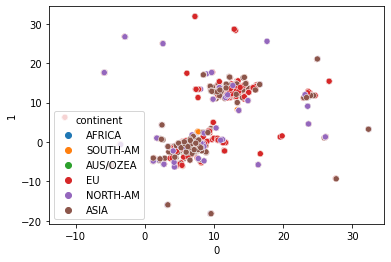

In [11]:
umap_embedding = pd.DataFrame(umap.UMAP().fit_transform(scaled_data))

umap_embedding['country'] = t1['country']
umap_embedding['continent'] = t1['continent']

sns.scatterplot(data = umap_embedding, x=0, y = 1, hue="continent")


# Idea: Drop all track IDs that are duplicated. Maybe this makes countries less similar

In [12]:
non_duplicated_t1 = t1.drop_duplicates(subset=["track_id"], keep=False)
non_duplicated_t1 = np.asarray(t1.drop(metadata, axis = 1))
new_scaled_data = StandardScaler().fit_transform(non_duplicated_t1)

## tSNE without duplicates

In [13]:
tSNE_embedding = pd.DataFrame(TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(new_scaled_data))

tSNE_embedding['country'] = t1['country']
tSNE_embedding['continent'] = t1['continent']

sns.scatterplot(data = tSNE_embedding, x=0, y = 1, hue="continent")

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

## UMAP without duplicates

<AxesSubplot:xlabel='0', ylabel='1'>

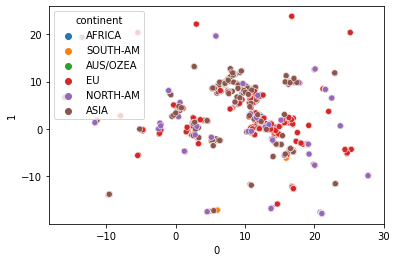

In [72]:
umap_embedding = pd.DataFrame(umap.UMAP().fit_transform(pca_data))

umap_embedding['country'] = t1['country']
umap_embedding['continent'] = t1['continent']

sns.scatterplot(data = umap_embedding, x=0, y = 1, hue="continent")